# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [5]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Find the shape of the dataframe
df.shape
print("There are", df.shape[0],"rows and", df.shape[1], "columns")

There are 1898 rows and 9 columns


#### Observations:


* The DataFrame has 1898 rows and 9 columns or variables
* There are 1898 orders in total

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


* All columns have 1898 observations indicating that there are no null values in it.
* There are 5 numerical columns and 4 object type columns.
* rating is read as object type column but it should be a numerical column
* restaurant_name, cuisine_type and day_of_the_week should be categorical variables

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Checking for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


* There are no (zero) missing values in the data.
* No treatment needed

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# summary statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [100]:
#Check the summary of non-numerical variables
df.describe(exclude='number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:


* Minimun time is 20.00 min
* Maximun time is 35 min
* On average it takes 27 min for food to be prepared when order is placed
* The category restaurant_name has 178 unique categories
* cuisine_type category has occured 14 times in the data
* The variable day_of_the_week has 2 unique categories (weekend and weeday)
* The rating variable has 4 categories

### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Find number of orders not given (rated)
df[df['rating']=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


#### Observations:


* 'Not given' entry refers to orders that are not rated
* A total of 736 orders are not rated 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [110]:
#Search unique order ID
df['order_id'].nunique()

1898

* There are 1898 total different orders in the dat

In [12]:
#Search unique custumor ID
df['customer_id'].nunique()

1200

* There are 1200 different customer_id
* Total orders is 1898 meaning there are 698 customer_id duplicates
* some orders have more than 1 customer_id

In [108]:
#Search out number of unique restaurant name
df['restaurant_name'].nunique()

178

* There are 178 different restaurant_name in the data

In [109]:
# Search out the number of unique cuisine type
df['cuisine_type'].nunique()

14

* There are 14 different cuisine_type in the data

<function matplotlib.pyplot.show(close=None, block=None)>

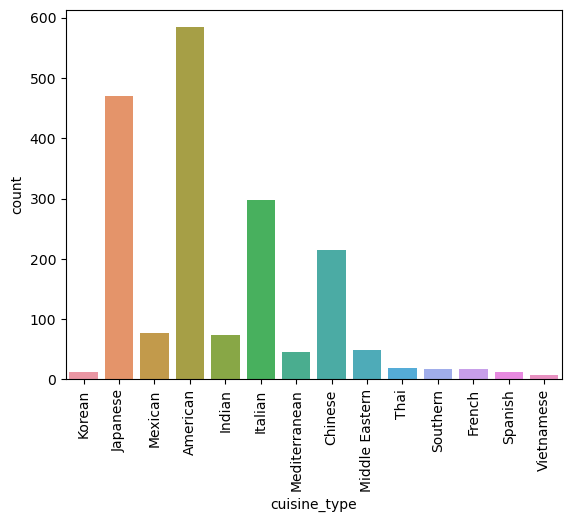

In [107]:
# Create a countplot for cuisine type
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show

 Observations
* American (Top1),Japaneese(Top2),Italian(Top3),Chinese(Top4) have the most number of orders respectively

In [23]:
# Seach out the values of unique day_of_the_week
df['day_of_the_week'].nunique()

2

* There are 2 differents day_of_the_week (weekend, weekday)

<function matplotlib.pyplot.show(close=None, block=None)>

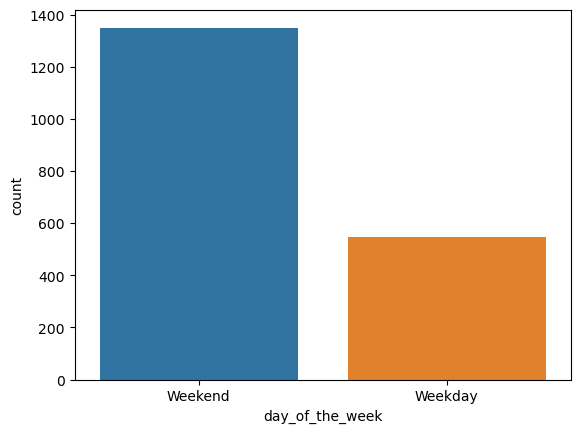

In [25]:
#create countplot for day_of_the_week
sns.countplot(data=df, x='day_of_the_week')
#plt.xticks(rotation=90)
plt.show

Observations
* The number of orders on the weekend is higher than on the weekday

In [26]:
#Search out unique values for rating
df['rating'].nunique()

4

* There are 4 different rating level in the data

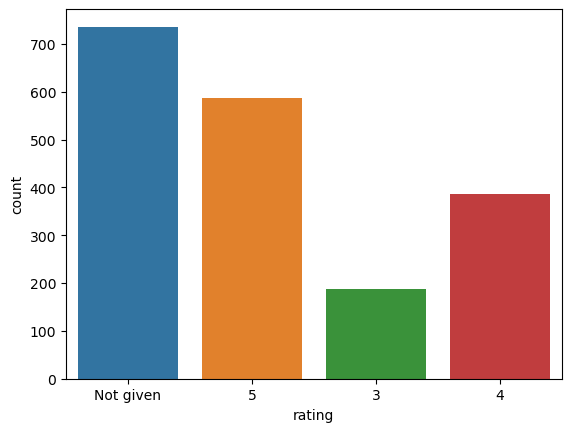

In [113]:
#Plot a bar graph for rating
sns.countplot(data=df, x='rating')
plt.show()

Observations
* The highest rating is 'Not given' and the smallest rating is '3'
* Rating '5' is higher than '3' and '4'

In [29]:
#Search out unique values for cost_of _the_order
df['cost_of_the_order'].nunique()

312

* There are 312 differents cost_of_the_order in the data

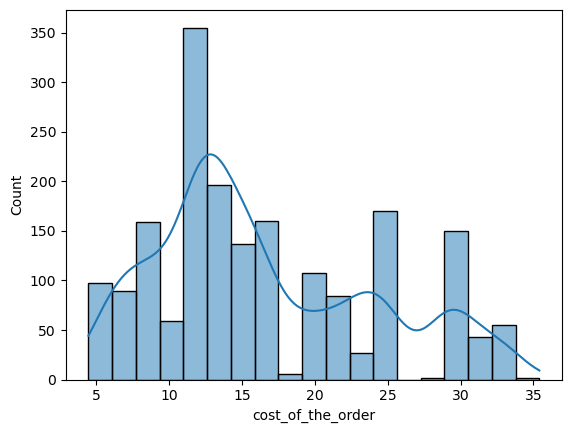

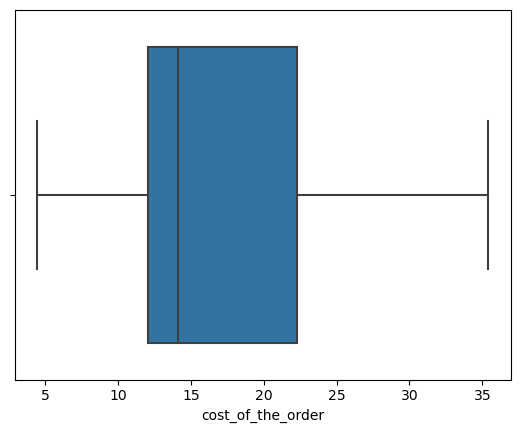

In [129]:
# create a histogram for cost_of_the_order
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.show()
# Create a box plot for cost_of _the_order
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

Observations

* The distribution of cost_of_the_order is skewed towards the left
* There are no outliers
* The median is around 16
* The majority of cost of the order is around 12

In [120]:
# Search out unique values for food_preparation
df['food_preparation_time'].nunique()

16

* There are 16 differents food preparation time in the data

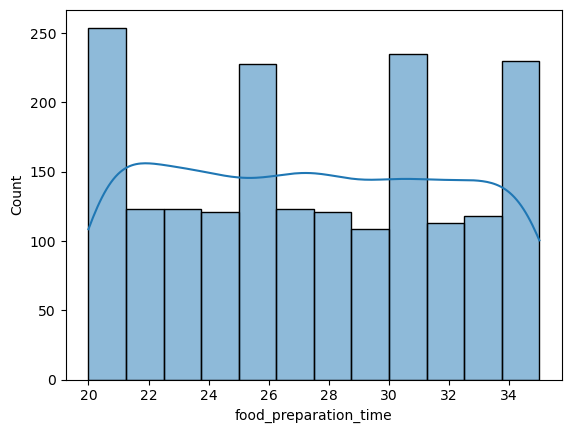

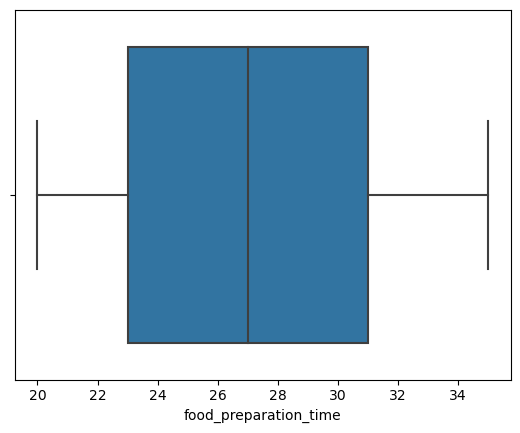

In [127]:
# Plot histogram for food_preparation_time
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()
# Plot a box plot for food_preparation_time
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

Observations
* The distribution of food_preparation_time is not skewed(normally distributed)
* The median is equal to the mean 27min
* The majority of preparation time is around 20-21 min

In [35]:
#Search unque values fgor delivery_time
df['delivery_time'].nunique()

19

* There are 19 differents delivery_time in the data

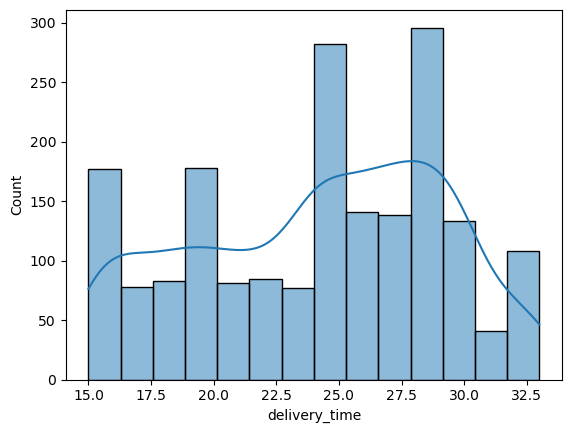

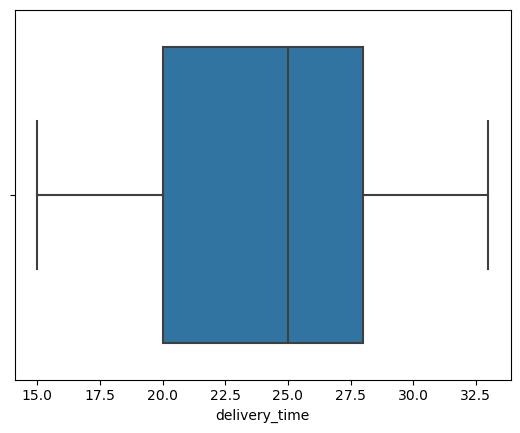

In [128]:
#Plot histogram for delivery time
sns.histplot(data=df, x='delivery_time', kde=True)
plt.show()
# Plot a box plot for delivery_time
sns.boxplot(data=df, x='delivery_time')
plt.show()

Observations
* The distribution of food_preparation_time is right-skewed
* There are no outliers
* Median is very closed to the mean
* The highest count delivery_time is around 28 min

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [121]:
#Top  restaurants with highest numbers of orders
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


* Top 5 restaurants: 
    1) Shake Shack
    2) The Meatball Shop
    3) Blue Ribbon Sushi
    4) Blue Ribbon Fried Chicken 
    5) Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [123]:
# Most popular cuisine on weekends
df_cuisine_weekends= df[df['day_of_the_week']=='Weekend']['cuisine_type']
df_cuisine_weekends.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:


* The most popular cuisine on weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [48]:
# Give orders that cost above 20 dollars
df[df['cost_of_the_order']>20].value_counts(normalize=True)

order_id  customer_id  restaurant_name                        cuisine_type    cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476560   149508       Shake Shack                            American        22.26              Weekend          4          32                     17               0.001802
1477852   74412        da Umberto                             Italian         32.98              Weekend          Not given  30                     28               0.001802
1477846   52574        Blue Ribbon Sushi                      Japanese        24.25              Weekday          5          30                     26               0.001802
1477847   106478       Blue Ribbon Sushi                      Japanese        24.25              Weekday          4          22                     29               0.001802
1477848   276192       12 Chairs                              Middle Eastern  29.05              Weekday          5          28               

In [49]:
# Number of total orders with cost above 20 dollars
"{:.2f}".format((len(df[df['cost_of_the_order']>20])/len(df))*100)

'29.24'

In [44]:
# print the percentage of those orders from data
# '{:.2f}'.format is to round at 2 numbers after decimal
print('The percentace of the orders cost more than 20 dollars', "{:.2f}".format((len(df[df['cost_of_the_order']>20])/len(df))*100), '%')

The percentace of the orders cost more than 20 dollars 29.24 %


#### Observations:


* The percentage of the orders cost more than 20 dollards is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [125]:
# Write the code here
'{:.2f}'.format(df['delivery_time'].mean())

'24.16'

#### Observations:


In [ ]:
* The mean order delivery time is 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [56]:
#Find the count of each customer_id
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:


* The top 3 most frequent customers and numbers of order they placed:
1) 52832        13
2) 47440        10
3) 83287        09  

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [66]:
#Check the variables
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


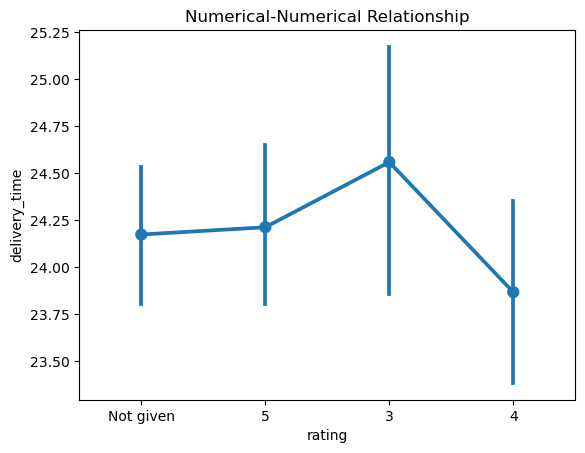

In [140]:
# Visualize the relationship between Rating and delivery time
#plt.figure(figsize=(15,7))
sns.pointplot(data=df,x='rating', y='delivery_time')
plt.title('Numerical-Numerical Relationship')
plt.show()

Observations
* The rating '3' has the highest mean delivery time than rating '5' and '4'.
* it makes sense because the longer it takes to deliver an order, the lower rate a customer is likely to give.
* There is a discrepancy betwen orders rated '5' and those rated '4' based on delivery time

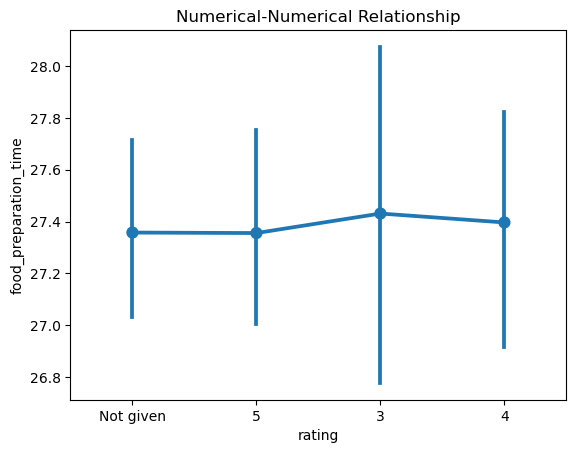

In [134]:
# Visualize the relationship between rating and food preparation time
#plt.figure(figsize=(15,7))
sns.pointplot(data=df,x='rating', y='food_preparation_time')
plt.title('Numerical-Numerical Relationship')
plt.show()

Observations
* The rating '3' has the highest prepration time and rating '5' has the lowest
* Rating 'Not given' has the same preparation time 
* The lowest delivery time rated '5' make sense as it show the customer satisfaction
* The rating "Not given" has lowest preparation time

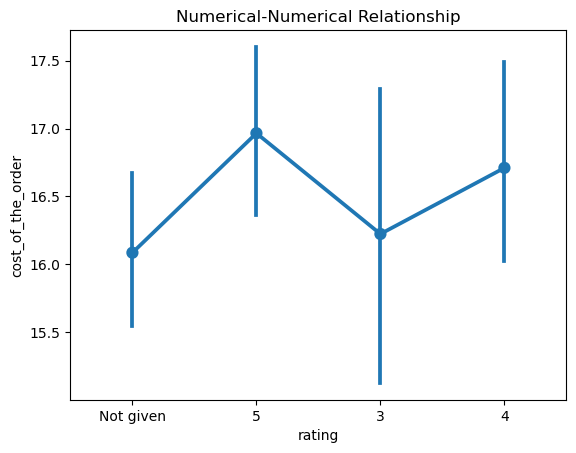

In [141]:
# Visualize relationship between Rating and cost of the order
#plt.figure(figsize=(15,7))
sns.pointplot(data=df,x='rating', y='cost_of_the_order')
plt.title('Numerical-Numerical Relationship')
plt.show()

Observations
* The rating '5' has the highest cost compared to rating '3' and '4'
* The more the order is expensive, the higher the rating
* The lowest order costs were not rated

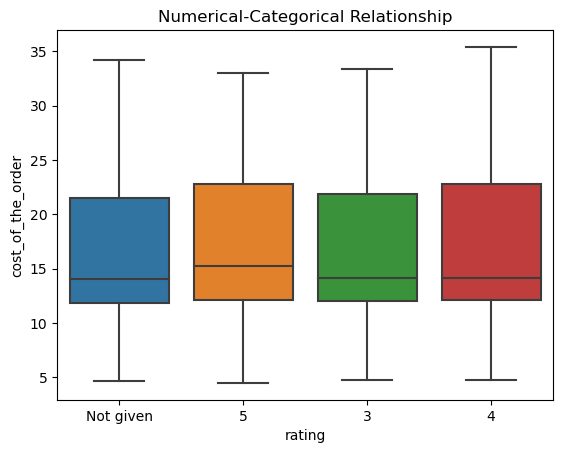

In [143]:
sns.boxplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Numerical-Categorical Relationship')
plt.show()

Observations
* All distribtions are skewed to the left meaning their means are less than their medians
* The cost of order with rating '5' is the highest
* There is no clear difference in cost for rating 'Not given', '4', '3'
* There are no outliers

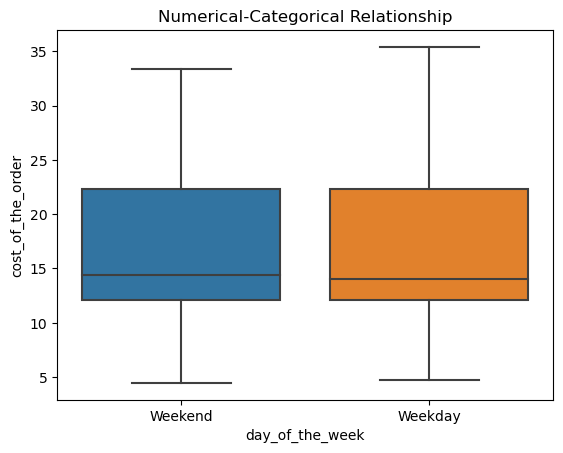

In [71]:
# Visualize relationship between day of the week and delivery time
#plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')
plt.title('Numerical-Categorical Relationship')
plt.show()

Observations
* The mean cost on the weekend is greater than on the weekday
* There are no outliers

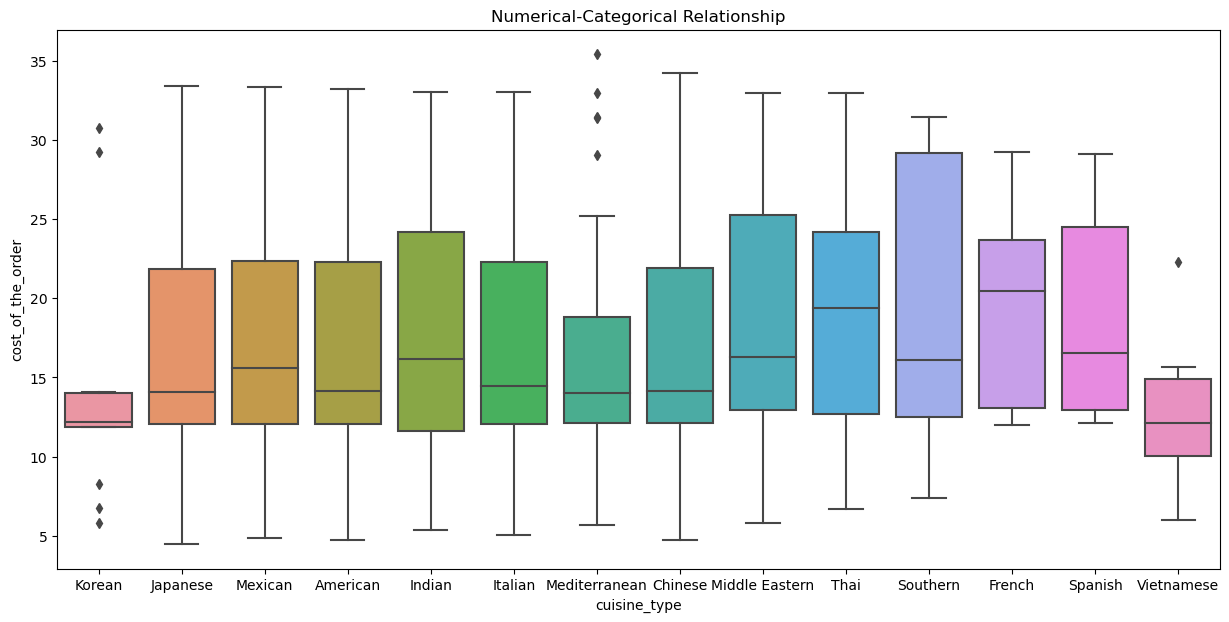

In [146]:
# Visualize relatioship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type', y='cost_of_the_order')
plt.title('Numerical-Categorical Relationship')
plt.show()

Observations
* There are outliers in the of korean, Mediterranean and Vietnamese cuisine
* The majority of distribution are skewed to the left except those of French and Thai cuisine which are right-skewed
* Vietnamese cost of order has the lowest median
* French cost of order has the highest median meaning it is the most expensive

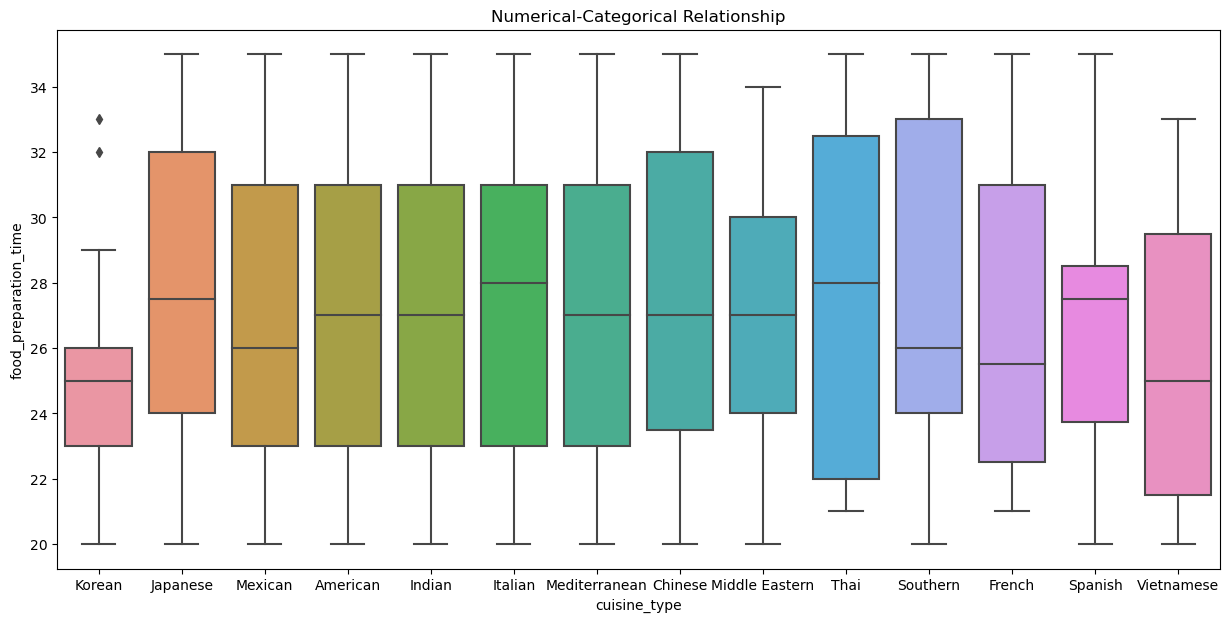

In [165]:
# Relationship between cuisine type and food preparation time
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.title('Numerical-Categorical Relationship')
plt.show()

Observations
* Outliers are presents in korean cuisine
* Korean cuisine has the shortest preparation time

In [158]:
df.corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


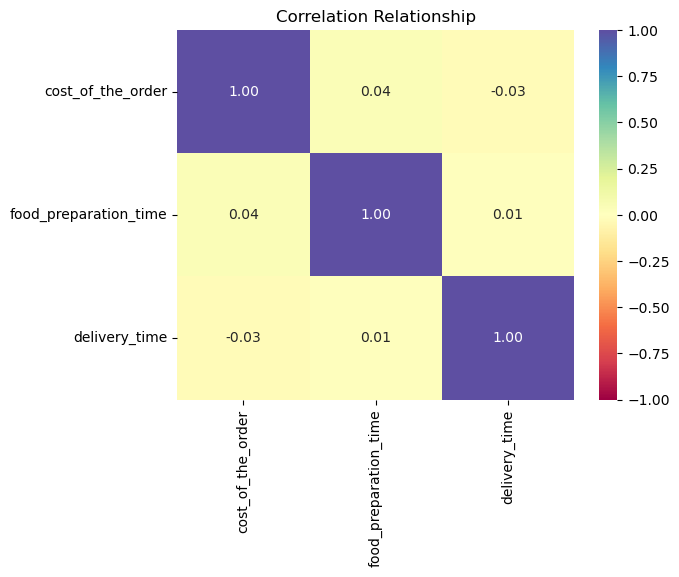

In [159]:
# Correlation between numerical variables
#create a heatmap
List=['cost_of_the_order','food_preparation_time','delivery_time']
#plt.figure(figsize=(15,9))
sns.heatmap(df[List].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.title('Correlation Relationship')
plt.show()

Observations
* Cost of the order show a slight positive correlation with food preparation time. It takes more time to prepare more expensive order.
* Food preparation time show a slight positive correlation with delivery time. It takes more time to deliver orders that take longer preparation time.
* Cost of the order shows a slight negative correlaion with delivery time. It take less time to deliver expensive orders.

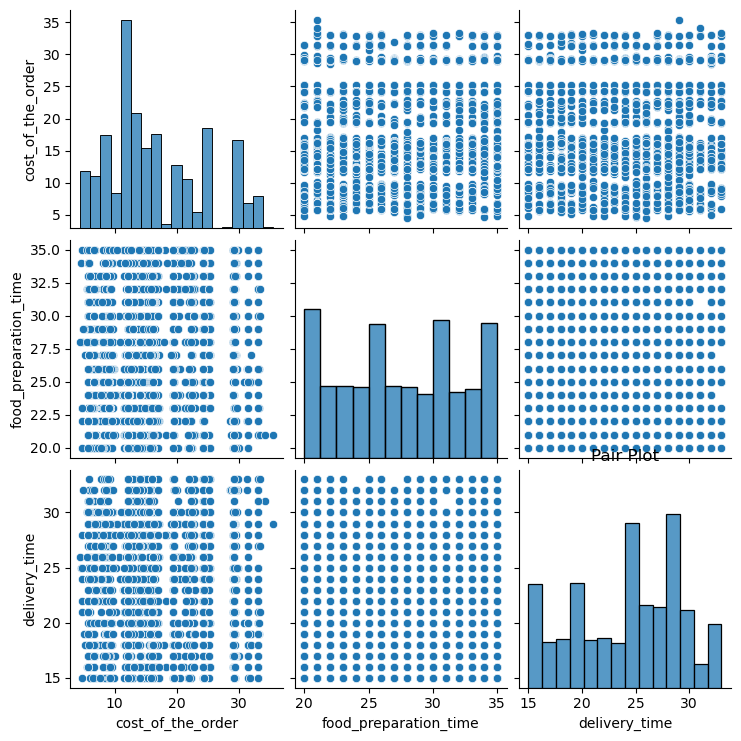

In [87]:
# Write the code here
# Let us visualize the pair plot
List=['cost_of_the_order','food_preparation_time','delivery_time']
sns.pairplot(df[List])
plt.title('Pair Plot')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [89]:
# Data of all the rated restaurants 
df1=df[df['rating']!='Not given']
# Converting rating from object to integer
df1['rating'] = df1['rating'].astype('int')
#Find the rating count of each restaurant
rating_count=df1.groupby('restaurant_name')['rating'].count()
#Find the avg rating per restaurant
avg_rating=df1.groupby('restaurant_name')['rating'].mean()
#Create a DataFrame with avg_rating and rating_count
df2= pd.DataFrame({'avg_rating': avg_rating, 'rating_count': rating_count})
# Restaurant with rating_count>50 and avg_rating>4
df2[(df2['avg_rating']>4) & (df2['rating_count']>50)]

,avg_rating,rating_count
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


#### Observations:


* The restaurants fulfilling the criteria are:
    1) Blue Ribbon Fried Chicken
    2) Bule Ribbon Sushi
    3) Shake Shack
    4) The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [90]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [156]:
#Create an empty list( list to store new cost of order after suchagres)
new_list=[]
# iterate the loop to get new cost with surcharges and sum to get the net revenu
for x in list(df['cost_of_the_order']):
    if x>20:
        new_list.append(1.25*x)
    elif x>5:
        new_list.append( 1.15*x)
    else:
        new_list.append(x)
sum(new_list)

37481.12299999992

#### Observations:


* The net revenu generated by the company across all oders is: 37481.12

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [94]:
df[df['delivery_time']>60]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


In [95]:
# Write the code here
print('The percentage of orders that take more than 60 min is:',len(df[df['delivery_time']>60])/len(df),'%')

The percentage of orders that take more than 60 min is: 0.0 %


#### Observations:


* There are no orders with a delivery time greater than 60 min

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [97]:
# Write the code here
#find weekdays
weekday=df['day_of_the_week']=='Weekday'
#create a dataframe with only weekdays in record
weekday_df=df[weekday]
#from this record find the deliver time
weekday_time=weekday_df['delivery_time']
#find the mean delivery time on weekday
weekday_time.mean()

28.340036563071298

In [98]:
# Mean delivery time on weekend
df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()

22.4700222057735

#### Observations:


* mean delivery time on weekday is 28.34 min.
* mean delivery time on weekend is 22.47 min.
* mean delivery time on weekday is greater than the time on weekend.
* Delivery on weekday is slower, meanwhile delivery on weekend is faster.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
We have been able to conclude that:
* Delivery time is faster on weekend 
* Cost of order is more expensive (higher) during weekend
* Most customers rated '3' because preprarations and time delivery were longer(high)
* Most customers gave a high rating on more expensive food
* Shake Skack is the restaurant with the highest number of orders received 
* All orders are placed, prepared and delivered in less than 60 min
* French cuisine is the most expensive order
* Korean cuisine has the shortest preparation time

### Recommendations:

* Delivery time must be improved on weekdays
* Business should decrease delivery and preparation times to get rating to move from '3' to '5'
* Increase the food quality and increase the cost

---